In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Following are the steps to be taken while fixing Rows and columns.
   1. Delete Summary Rows and Columns in the Dataset.
   2. Delete Header and Footer Rows on every page.
   3. Delete Extra Rows like blank rows,page numbers, etc.
   4. We can merge different columns for better understanding of the data
   5. We can also split one columns into multiple columns based on our requirements or understandind.
   6. Add Columns names, it is very important to have columns names to the dataset.

In [7]:
data.duplicated().any()

False

In [ ]:
# Drop the customer id as it is of no use.
data.drop('customerid', axis = 1, inplace = True)

In [10]:
data['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [ ]:
# Extract job and Education in newly from "jobedu" column.
data['jon'] = data['jobedu'].apply(lambda x : x.split(",")[0])
data['education'] = data['jobedu'].apply(lambda x: x.split(',')[1])

In [ ]:
# drop  jobedu column
data.drop('jobedu', axis=1, inplace=True)
data

Missing values
There are mainly three types of missing values

   1. MCAR(Missing completely at random): These values do not depend on any other features.
   2. MAR(Missing at random): These values may be dependent on some other features.
   3. MNAR(Missing not at random): These missing values have some reason for why they are missing.


In [12]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
# Droping the records with age missing in data dataframes
data.dropna(subset=['age'], inplace=True)

# check it once
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [18]:
# Find the mode of the month in data
month_mode = data.month.mode()[0]
print(month_mode)

# fill the missing values with mode value of the month in data
data['month'].fillna(month_mode, inplace = True)
data['month'].isnull().sum()

may


C:\Users\dell\AppData\Local\Temp\ipykernel_12184\2643277115.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['month'].fillna(month_mode, inplace = True)


0

Handling Outliers : There are two types of outliers

   1. Univariate outliers: are the data points whose values lie beyond the range of expected values based on variable.
   2. Multivariate outliers: while plotting data, some values of one variable may not lie beyond the expected range. but when you plot the data
                               with some other variables, these values may lie far the expected value.


Univariate Analysis

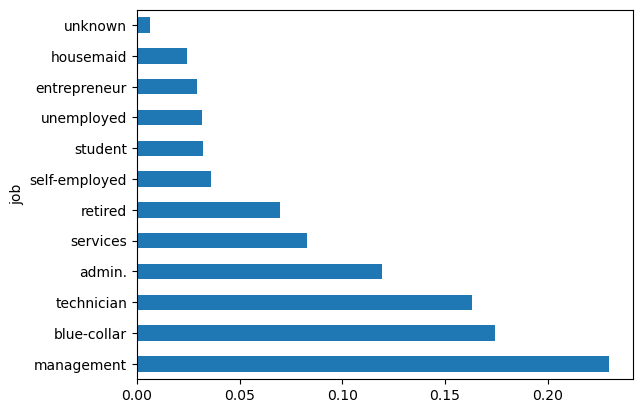

In [22]:
# lets calculated the percentage of each job status category.
data['job'].value_counts(normalize=True)

# Plot the bar graph of percentage job categories.
data['job'].value_counts(normalize =True).plot.barh()
plt.show()

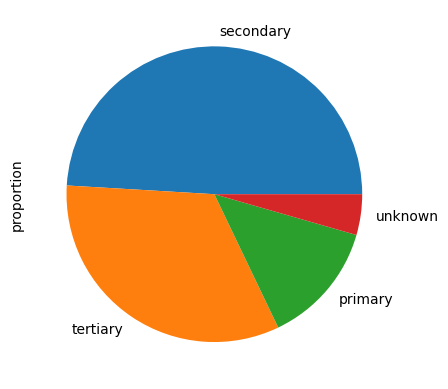

In [25]:
# Calculate the percentage of each education category.
data['education'].value_counts(normalize=True)

#plot the pie chart of education categories.
data['education'].value_counts(normalize=True).plot.pie()
plt.show()

In [27]:
##data['salary'].describe()

Bivariate Analysis

1. Numeric-Numeric Analysis

# Scatter Plot

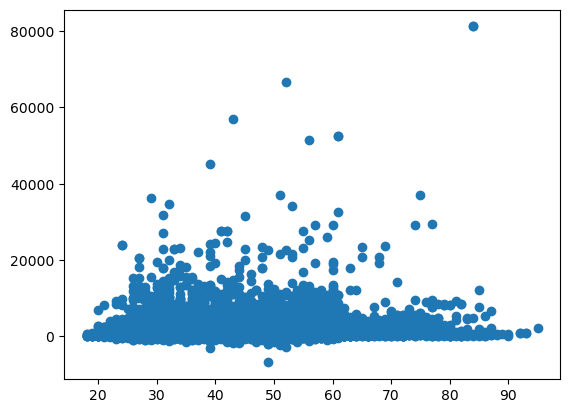

In [29]:
# plot the scatter plot of balance and salary variable in data
plt.scatter(data['age'],data['balance'])
plt.show()

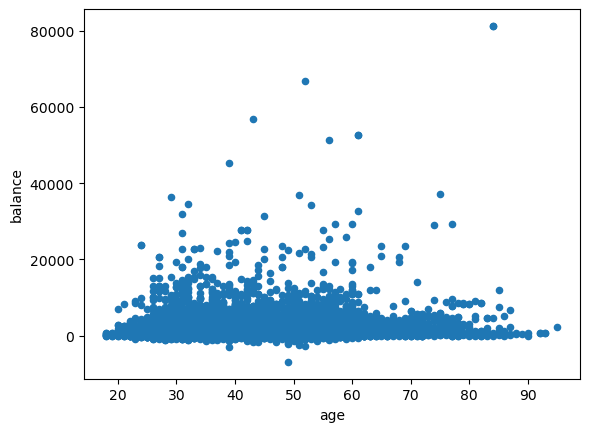

In [31]:
#Plot the scatter plot of balance and age variable in data
data.plot.scatter(x='age', y='balance')
plt.show()

 # Pair plot

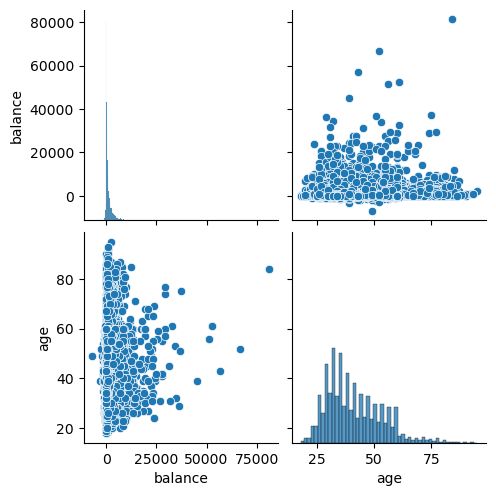

In [32]:
# plot the pair of salary, balance and age in data dataframe
sns.pairplot(data = data, vars = ['balance','age'])
plt.show()

# Correlation matrix

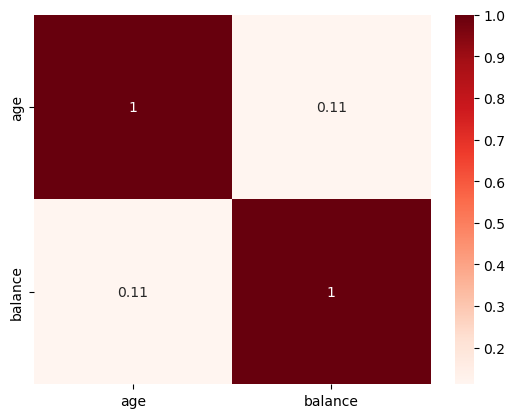

In [34]:
# Creating a matrix using age,balance as rows and columns
data[['age','balance']].corr()

# plot the correlation matrix of salary, balance and age in data dataframes.
sns.heatmap(data[['age','balance']].corr(), annot =True, cmap = 'Reds')
plt.show()


# 2. Numeric - Categorical Analysis

In [ ]:
#groupby the response to find the mean of the salary with response no & yes separately.
data.groupby('response')['salary'].mean()

In [ ]:
##groupby the response to find the median of the salary with response no & yes separately.
data.groupby('response')['salary'].median()

In [ ]:
#plot the box plot of salary for yes and no response
sns.boxplot(data['response'],data['salary'])
plt.show()

# 3. Categorical - Categorical Analysis

In [39]:
#creat response_rate of numerical data type where response "yes" = 1, "no"=0
data['loan_rate']=np.where(data['loan']=='yes',1,0)
data.loan_rate.value_counts()

loan_rate
0    9702
1    1460
Name: count, dtype: int64

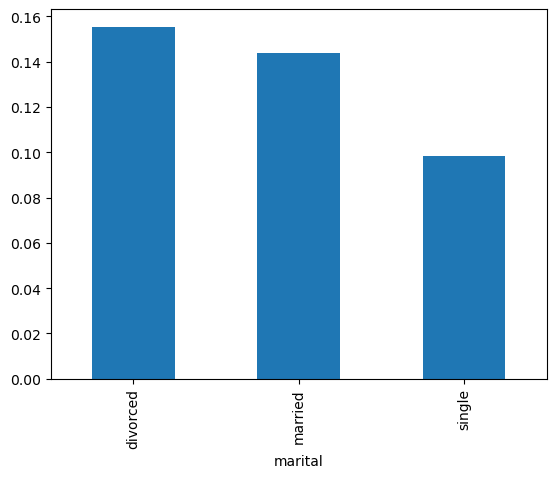

In [40]:
#plot the bar graph of marital status with average value of loan_rate
data.groupby('marital')['loan_rate'].mean().plot.bar()
plt.show()

# Multivariate Analysis

In [42]:
result = pd.pivot_table(data=data, index='education', columns='marital', values='loan_rate')
print(result)

marital    divorced   married    single
education                              
primary    0.112745  0.145587  0.111675
secondary  0.194785  0.165064  0.131455
tertiary   0.124352  0.118285  0.066438
unknown    0.058824  0.069204  0.019108


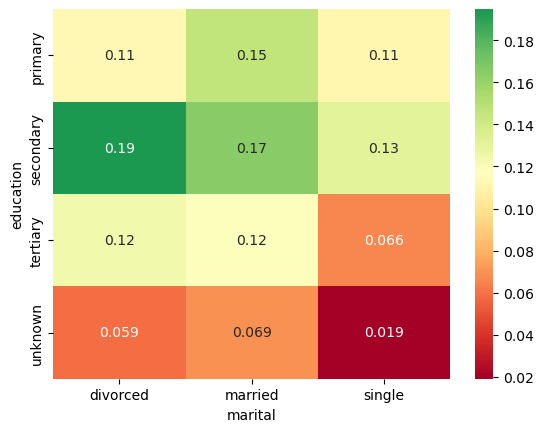

In [43]:
#Create heat map of education vs loan_rate
sns.heatmap(result, annot=True, cmap= 'RdYlGn', center=0.117)
plt.show()

In [45]:
data['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

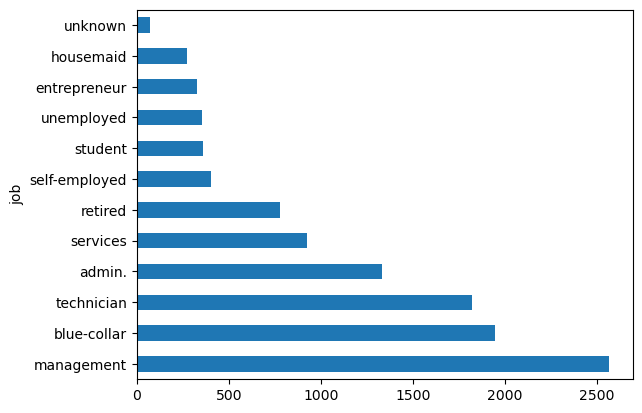

In [46]:
data['job'].value_counts().plot.barh()
plt.show()